In [21]:
import pandas as pd

data = pd.read_csv('./data/titanic.csv')

In [22]:
data.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
534,535,0,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S


In [23]:
print(f"El shape del conjunto de entrenamiento es {data.shape}. {data.shape[0]} filas y {data.shape[1]} columnas.")

El shape del conjunto de entrenamiento es (891, 12). 891 filas y 12 columnas.


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


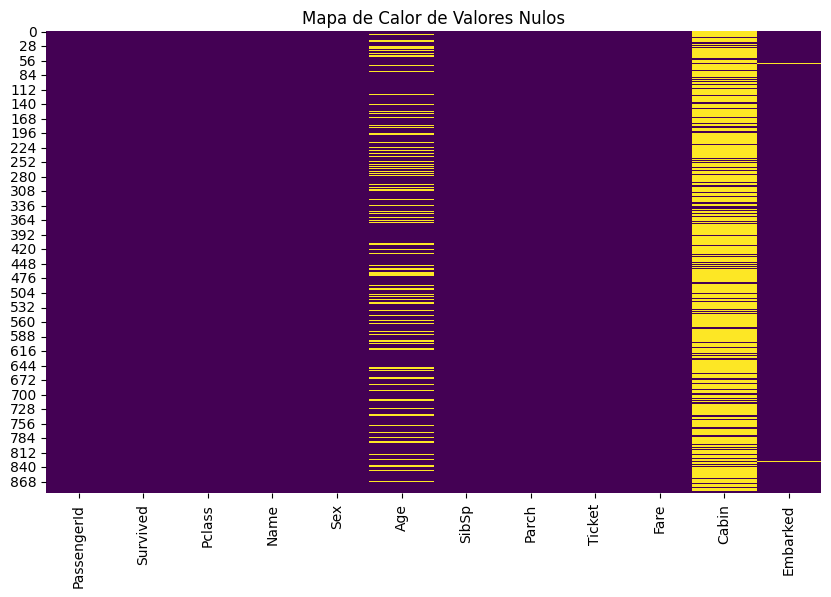

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tu dataframe se llama 'df'
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.title('Mapa de Calor de Valores Nulos')

# Guardar el gráfico como un archivo PNG
plt.savefig('output.png', format='png')

# Mostrar el gráfico
plt.show()

In [26]:
missing_values_percentage = data.isnull().mean() * 100
missing_values_percentage = missing_values_percentage.round(2).sort_values(ascending=False)
print(missing_values_percentage)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Name            0.00
Pclass          0.00
Survived        0.00
Sex             0.00
Parch           0.00
SibSp           0.00
Fare            0.00
Ticket          0.00
dtype: float64


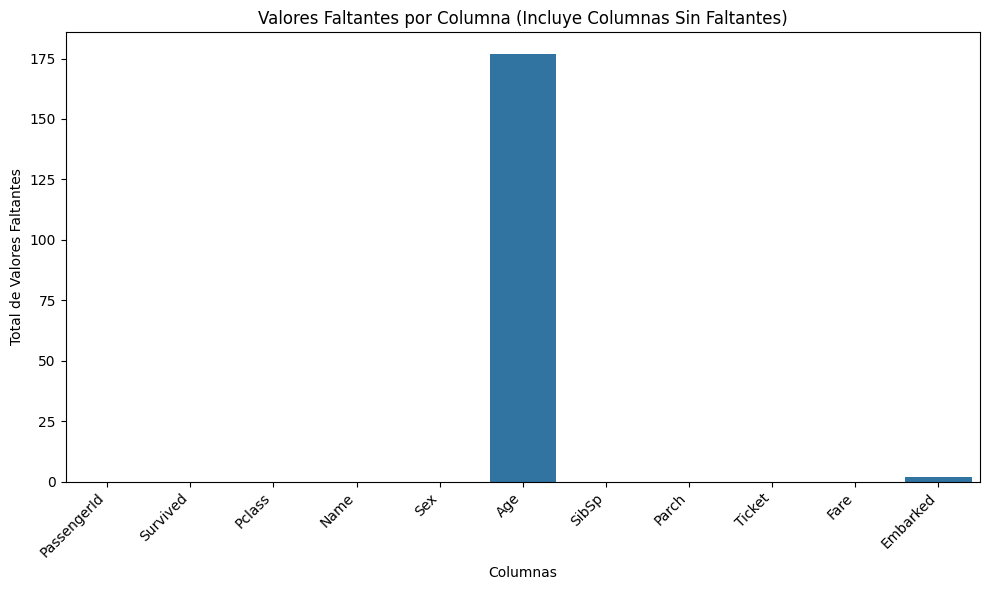

In [29]:
# Calcular el número de valores faltantes por columna
missing_values = data.isnull().sum()

# Convertir a DataFrame para usar con Seaborn
missing_df = missing_values.reset_index()
missing_df.columns = ['Column', 'MissingValues']

# Graficar con Seaborn (todas las columnas, incluso las sin valores faltantes)
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='MissingValues', data=missing_df)

# Personalización de la gráfica
plt.title("Valores Faltantes por Columna (Incluye Columnas Sin Faltantes)")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total de Valores Faltantes")
plt.xlabel("Columnas")
plt.tight_layout()
plt.show()

In [28]:
data.drop('Cabin', axis = 1, inplace = True)

In [32]:
# Calcular la mediana de la columna Age
median_age = data['Age'].median()

# Imputar los valores nulos con la mediana
data['Age'] = data['Age'].fillna(median_age)

In [33]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [34]:
# Verificar que este en ceros
round(data.isnull().sum().sort_values(ascending = False) / len(data) * 100, 2)

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

In [35]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [37]:
# Verficar valor duiplicados
data.duplicated().sum()

np.int64(0)

In [39]:
data.drop('Name', axis = 1, inplace = True)
data.drop('Ticket', axis = 1, inplace = True)
data.drop('PassengerId', axis = 1, inplace = True)

In [42]:
print(f"Después de limpiar df: {data.shape[0]} filas y {data.shape[1]} columnas.")

Después de limpiar df: 891 filas y 8 columnas.


In [43]:
data.to_csv('./data/titanic_clean.csv', index=False)